In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

# Dataset Description

The dataset contains information about board games listen on BoardGameGeek.com, an online forum for board game enthusiasts.

### Collection Process

### Dataset Structure

### Variables
GAMES 
>   BGGId			       - BoardGameGeek game ID \
	Name			       - Name of game \
	Description		       - Description, stripped of punctuation and lemmatized \
	YearPublished	       - First year the game was published \
	GameWeight		       - General measure for how difficult/complex a game is, ranges from 1-5 \
	AvgRating		       - Average user rating for game \
	BayesAvgRating	       - Bayes weighted average for game (x # of average reviews applied) \
	StdDev			       - Standard deviation of Bayes Avg \
	MinPlayers		       - Minimum number of players \
	MaxPlayers		       - Maximun number of players \
	ComAgeRec		       - Community's recommended age minimum \
	LanguageEase	       - Language requirement \
	BestPlayers		       - Community voted best player count \
	GoodPlayers		       - List of community voted good player counts \
	NumOwned		       - Number of users who own this game \
	NumWant			       - Number of users who want this game \
	NumWish			       - Number of users who wishlisted this game \
	NumWeightVotes	       - ? Unexplained \
	MfgPlayTime		       - Manufacturer Stated Play Time \
	ComMinPlaytime	       - Community minimum play time \
	ComMaxPlaytime	       - Community maximum play time \
	MfgAgeRec		       - Manufacturer Age Recommendation \
	NumUserRatings	       - Number of user ratings \
	NumComments		       - Number of user comments \
	NumAlternates	       - Number of alternate versions \
    NumExpansions	       - Number of expansions \
	NumImplementations	   - Number of implementations \
	IsReimplementation	   - Binary flag for whether the listing is a reimplementation \
	Family			       - Game family \
	Kickstarted		       - Binary flag for whether the game is a kickstarter? \
	ImagePath		       - Image http:// path \
	Rank:boardgame		   - Rank for boardgames overall \
	Rank:strategygames	   - Rank in strategy games \
	Rank:abstracts		   - Rank in abstracts \
	Rank:familygames	   - Rank in family games \
	Rank:thematic		   - Rank in thematic \
	Rank:cgs		       - Rank in card games \
	Rank:wargames		   - Rank in war games \
	Rank:partygames		   - Rank in party games \
	Rank:childrensgames	   - Rank in children's games \
	Cat:Thematic		   - Binary flag for whether game is in Thematic category \
	Cat:Strategy		   - Binary flag for whether game is in Strategy category \
	Cat:War			       - Binary flag for whether game is in War category \
	Cat:Family		       - Binary flag for whether game is in Family category \
	Cat:CGS			       - Binary flag for whether game is in Card Games category \
	Cat:Abstract		   - Binary flag for whether game is in Abstract category \
	Cat:Party		       - Binary flag for whether game is in Party category \
	Cat:Childrens		   - Binary flag for whether game is in Childrens category 

MECHANICS 
>   BGGId			       - BoardGameGeek game ID \
	Remaining headers are various mechanics with binary flag 

THEMES 
>   BGGId			        - BoardGameGeek game ID \
	Remaining headers are various themes with binary flag 

SUBCATEGORIES 
>   BGGId			        - BoardGameGeek game ID \
	Remaining headers are various subcategories with binary flag 

ARTISTS_REDUCED 
>   BGGId			        - BoardGameGeek game ID \
	Low-Exp Artist		    - Indicates game has an unlisted artist with <= 3 entries \
	Remaining headers are various artists with binary flag 

DESIGNERS_REDUCED 
>   BGGId			        - BoardGameGeek game ID \
	Low-Exp Designer	    - Indicates game has an unlisted designer with <= 3 entries \
	Remaining headers are various subcategories with binary flag 

PUBLISHERS_REDUCED 
>   BGGId			        - BoardGameGeek game ID \
	Low-Exp Publisher	    - Indicated games has an unlisted publisher with <= 3 entries \
	Remaining headers are various subcategories with binary flag 

USER_RATINGS 
>   BGGId			        - BoardGameGeek game ID \
	Rating			        - Raw rating given by user \
	Username		        - User giving rating 

RATINGS_DISTRIBUTION 
>   BGGId			        - BoardGameGeek game ID \
	Numbers 0.0-10.0	    - Number of ratings per rating header \
	total_ratings		    - Total number of ratings for game 

# Data Cleaning

### Load Relevant Files of Dataset

In [2]:
#load_csv = lambda csv_name: pd.read_csv(f'dataset/{csv_name}.csv')

games = pd.read_csv('dataset/games.csv',
                    usecols=['BGGId', 'Name', 'GameWeight', 'AvgRating', 'YearPublished', 'NumOwned', 'MfgAgeRec', 'ComAgeRec']
                   )
games.head()

,BGGId,Name,YearPublished,GameWeight,AvgRating,ComAgeRec,NumOwned,MfgAgeRec
0,1,Die Macher,1986,4.3206,7.61428,14.366667,7498,14
1,2,Dragonmaster,1981,1.9630,6.64537,NaN,1285,12
2,3,Samurai,1998,2.4859,7.45601,9.307692,15578,10
3,4,Tal der Könige,1992,2.6667,6.60006,13.000000,638,12
4,5,Acquire,1964,2.5031,7.33861,11.410256,23735,12


Before analyzing the data, we first check for any 'dirtiness' in the relevant columns.

In [3]:
def check_cleanliness_property(name, f):
    print(name + '\n---------------------\n')
    games.columns.map(lambda col: print(f"{col.ljust(14)}: {f(games[col])}"))
    print()

# check types 
check_cleanliness_property('Data Type', lambda s: s.dtype)

# check range of values
check_cleanliness_property('Range of Values', lambda s: f'[{s.min()}, {s.max()}]')

# check for missing values
check_cleanliness_property('Has missing values?', lambda s: s.isna().any())

# check for duplicates in games dataframe
print(f"Games has duplicate rows: {games.duplicated().any()}")

Data Type
---------------------

BGGId         : int64
Name          : object
YearPublished : int64
GameWeight    : float64
AvgRating     : float64
ComAgeRec     : float64
NumOwned      : int64
MfgAgeRec     : int64

Range of Values
---------------------

BGGId         : [1, 349161]
Name          : ["La Garde recule!", 聖杯サクセション (Throne and the Grail)]
YearPublished : [-3500, 2021]
GameWeight    : [0.0, 5.0]
AvgRating     : [1.04133, 9.91429]
ComAgeRec     : [2.0, 21.0]
NumOwned      : [0, 166497]
MfgAgeRec     : [0, 25]

Has missing values?
---------------------

BGGId         : False
Name          : False
YearPublished : False
GameWeight    : False
AvgRating     : False
ComAgeRec     : True
NumOwned      : False
MfgAgeRec     : False

Games has duplicate rows: False


All data types are appropriate. The table has no duplicate rows. With the possible exception of Year Published, the ranges of values of the features are within their allowable values, suggesting no default values are used to mark missing data. No column has missing values except for ComAgeRec.

We now investigate YearPublished further to see whether it realyl contains invalid values. We can visualize it with a histogram to see the spread of values.

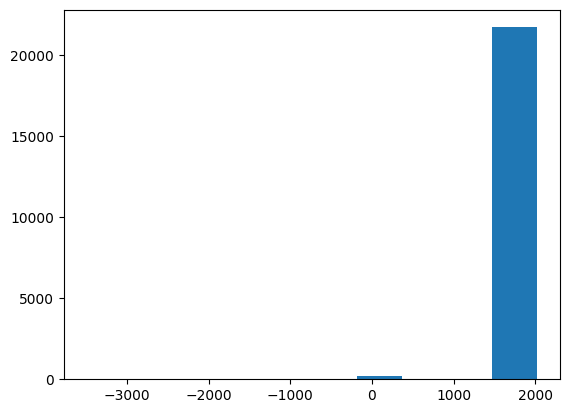

In [4]:
plt.hist(games['YearPublished'], bins=10)
plt.show()

There are certain games whose year of publication is listed as less than 500. 

In [5]:
pd.set_option('display.max_rows', 213)

df = games.query('YearPublished < 1000')[['Name', 'YearPublished', 'NumOwned']].sort_values('YearPublished')
print(df.shape[0])
df

213


,Name,YearPublished,NumOwned
1723,Senet,-3500,1411
5345,Knucklebones,-3000,93
3356,Marbles,-3000,417
1721,Backgammon,-3000,18722
1195,The Royal Game of Ur,-2600,1279
164,Go,-2200,21331
2574,Nine Men's Morris,-1400,1733
6640,Three Men's Morris,-1400,63
5378,Tic-Tac-Toe,-1300,1439
3304,Chutes and Ladders,-200,4748


Looking at these 213 board games, a few things should be noted. First, 0 is not a valid value for a year of publication because the Gregorian calendar does not have a 0th year, so entries with YearPublished = 0 were either enocoded wrong or have 0 as a placeholder for a missing value. Second, is nothing odd about the values that are not 0, since some board games really were invented a very long time ago and negative values correspond to years 'BC'. Since there are only less than 213 rows with YearPublished = 0 out of over 21 thousand, we decide to remove them.

In [6]:
games = games[games['YearPublished'] != 0]

print('Proportion of rows with missing ComAgeRec: ', games['ComAgeRec'].isna().sum() / games.shape[0])
print('Number of rows after deletion:', games.shape[0])

Proportion of rows with missing ComAgeRec:  0.2511503773237622
Number of rows after deletion: 21732


Looking at ComAgeRec, there are too many missing entries to simply delete them all. Instead of interpolating, since we planned to use ComAgeRec as a measure of the recommended age, we can just drop it and use MfgAgeRec instead.

In [7]:
games.drop(columns=['ComAgeRec'], inplace=True)

# Exploratory Data Analysis

### Which variables have outliers?

Knowing that YearPublished has extreme values, we should also check the other features for outliers before looking at the distribution.

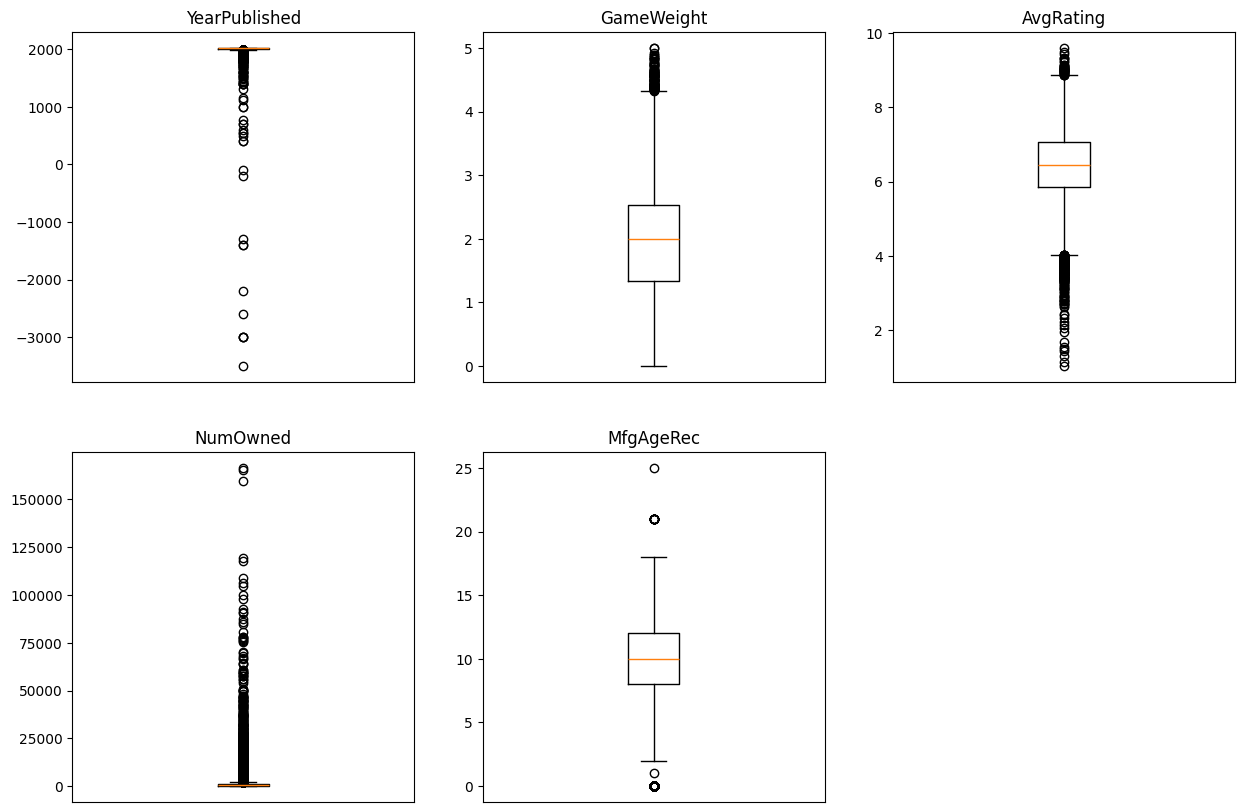

In [9]:
plot_vars = [col for col in games.columns[2:]]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in range(2):
    for j in range(3):
        if 3*i + j < len(plot_vars):
            ax[i, j].boxplot(games[plot_vars[3*i + j]])
            ax[i, j].title.set_text(plot_vars[3*i + j])
            ax[i, j].axes.get_xaxis().set_visible(False) # hide x-axis
        else:
            fig.delaxes(ax[i,j])
        
plt.show()

Looking at the boxplots, we can see that all the variables have extreme values. Since we don't yet know the distributions of the variables, we use the interquartile range to identify outliers instead of the Z-scores. Any observation greater than Q3 + 1.5(IQR) or less than Q1 - 1.5(IQR), i.e. any observation with a feature outside the whiskers, will be considered an outlier.

In [10]:
# get Q1, Q3, and IQR for every variable
quartiles = games[plot_vars].quantile([0.25, 0.75]) 
IQRs = pd.Series([quartiles[col][0.75] - quartiles[col][0.25] for col in plot_vars], index=plot_vars)

# return lower/upper whiskers of a variable using its quartile
def get_whisker(col, lower):
    dist = 1.5*IQRs[col]
    
    if lower:
        return quartiles[col][0.25] - dist
    else:
        return quartiles[col][0.75] + dist
    
lower_whiskers = pd.Series([get_whisker(col, True) for col in plot_vars], index=plot_vars)
upper_whiskers = pd.Series([get_whisker(col, False) for col in plot_vars], index=plot_vars)

print(quartiles, '\n')
print(IQRs, '\n')
print('Lower Whiskers:\n', lower_whiskers, '\n')
print('Upper Whiskers:\n', upper_whiskers, '\n')

filt = lambda row: row.between(lower_whiskers, upper_whiskers).all()

      YearPublished  GameWeight  AvgRating  NumOwned  MfgAgeRec
0.25         2002.0     1.33330    5.84304    152.00        8.0
0.75         2017.0     2.53115    7.05505    907.25       12.0 

YearPublished     15.00000
GameWeight         1.19785
AvgRating          1.21201
NumOwned         755.25000
MfgAgeRec          4.00000
dtype: float64 

Lower Whiskers:
 YearPublished    1979.500000
GameWeight         -0.463475
AvgRating           4.025025
NumOwned         -980.875000
MfgAgeRec           2.000000
dtype: float64 

Upper Whiskers:
 YearPublished    2039.500000
GameWeight          4.327925
AvgRating           8.873065
NumOwned         2040.125000
MfgAgeRec          18.000000
dtype: float64 



We now check how many observations do not have at least one feature with an extreme value.

In [46]:
extreme = games.shape[0] - games[plot_vars].apply(filt, axis=1).sum()

print('# of extreme values:', extreme)
print('Proportion of extreme values:', extreme/games.shape[0])

# of extreme values: 5465
Proportion of extreme values: 0.2514724829744156


Since over a quarter of observations have extreme values, we will not delete outlier observations and instead impose a cap on them. We'll use the lower and upper whiskers as the caps.

In [12]:
# the new series after every number has been capped
def cap_col(series):
    l, h = lower_whiskers[series.name], upper_whiskers[series.name]
    
    def cap(x):
        if x > h:
            return h
        elif x < l:
            return l
        else:
            return x
        
    return series.map(cap)    

capped_games = pd.concat([games[['BGGId', 'Name']], games[plot_vars].apply(cap_col)], axis=1)

Plotting the data to make sure it was really changed, we see there aren't any extreme values anymore.

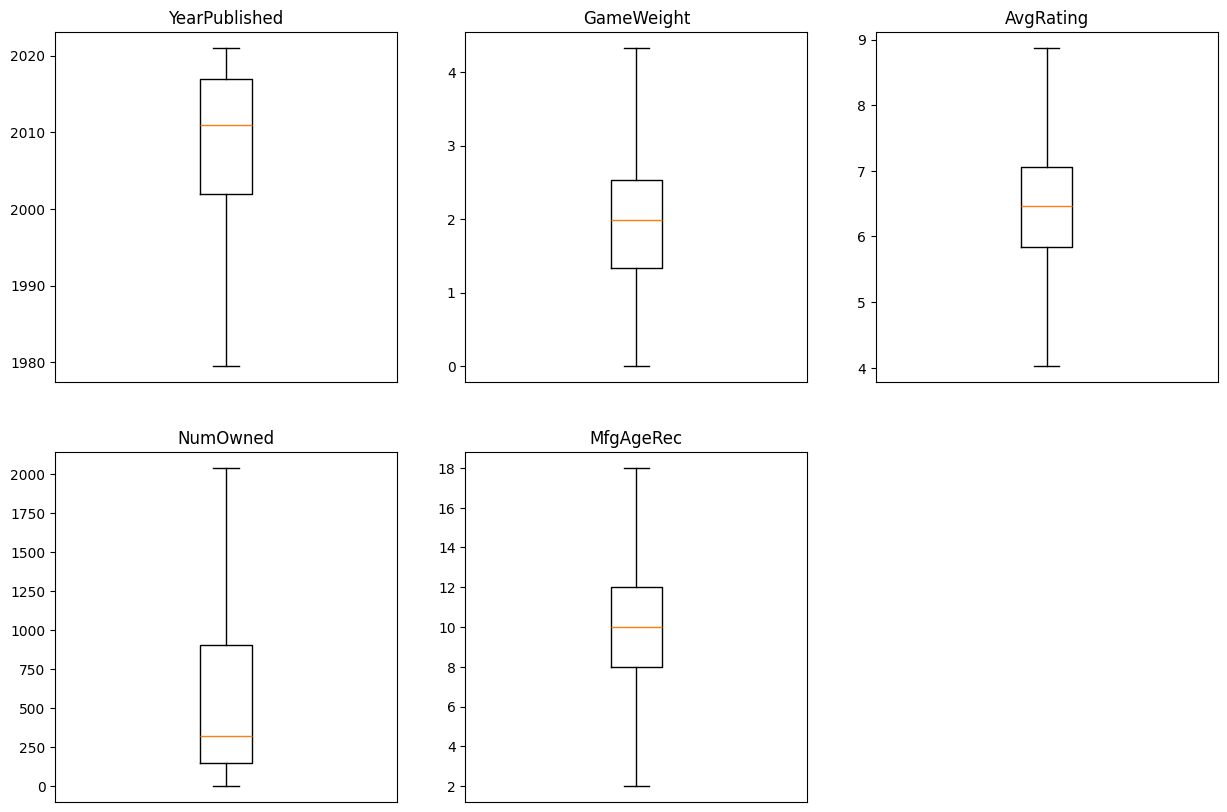

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in range(2):
    for j in range(3):
        if 3*i + j < len(plot_vars):
            ax[i, j].boxplot(capped_games[plot_vars[3*i + j]])
            ax[i, j].title.set_text(plot_vars[3*i + j])
            ax[i, j].axes.get_xaxis().set_visible(False) 
        else:
            fig.delaxes(ax[i,j])
            
plt.show()

### How are the variables distributed?

In particular, we would like to know whether the variabels are normally distributed or not, as these determine what statiscial methods will be most appropriate to apply.

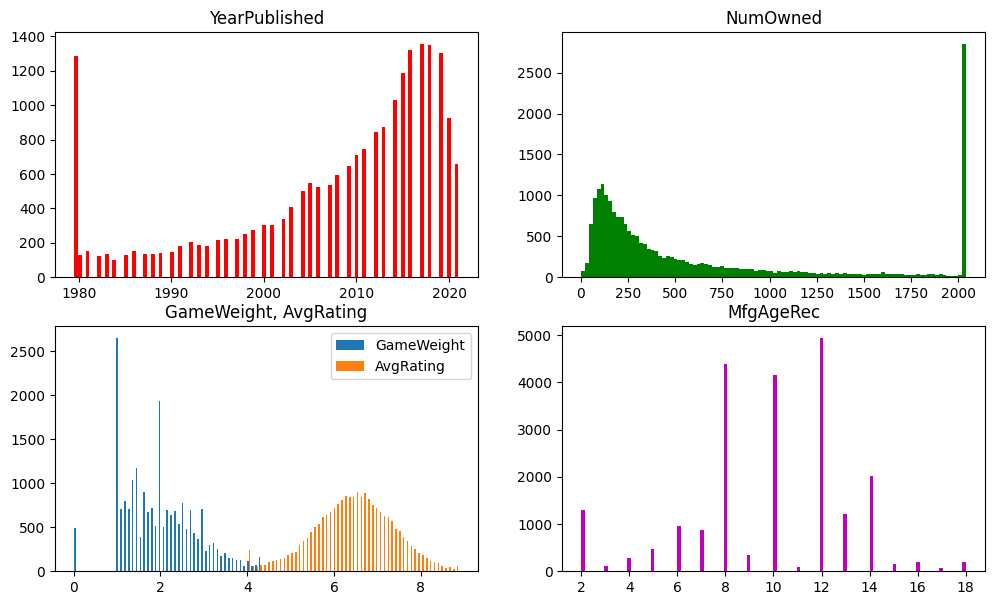

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

ax[0, 0].hist(capped_games['YearPublished'], bins=100, color='r')
ax[0, 0].set_title('YearPublished')

ax[0, 1].hist(capped_games['NumOwned'], bins=100, color='g')
ax[0, 1].set_title('NumOwned')

ax[1, 0].hist([capped_games['GameWeight'], capped_games['AvgRating']], bins=100)
ax[1, 0].set_title('GameWeight, AvgRating')
ax[1, 0].legend(['GameWeight', 'AvgRating'])

ax[1, 1].hist(capped_games['MfgAgeRec'], bins=100, color='m')
ax[1, 1].set_title('MfgAgeRec')

plt.show()

Looking at their distributions, unfortunately, the only variable that is clearly normal is AvgRating. YearPublished and NumOwned also seem negatively and positively skewed, respectively.

### How much variety of board games is there?
There can obviously be many genres of board games, but we can also see how board games vary in terms of numerical variables, like their difficulty (GameWeight) or their recommended minimum age (MfgAgeRec). A measure of dispersion will give us an idea of the variety board games. We use standard deviation since unlike the IQR, it considers all data points instead of just 2.

In [54]:
capped_games[plot_vars].std(axis=0)

YearPublished     11.946291
GameWeight         0.845383
AvgRating          0.910164
NumOwned         673.931773
MfgAgeRec          3.316399
dtype: float64

### What are the central tendencies of the variables?

The median is the most appropriate measure to answer this because the variables are skewed and numerical.

In [55]:
capped_games[plot_vars].median(axis=0)

YearPublished    2011.00000
GameWeight          1.99105
AvgRating           6.45861
NumOwned          324.00000
MfgAgeRec          10.00000
dtype: float64

### What ratings are exceptionally rare?

### How are the variables related to each other?

### Is there a relationship between the difficulty of a game and its average rating?

In the games dataframe, the GameWeight and AvgRating variables correspond to game difficulty and the average rating, respectively. Now we can use a scatterplot to visualize the relationship between these two variables.

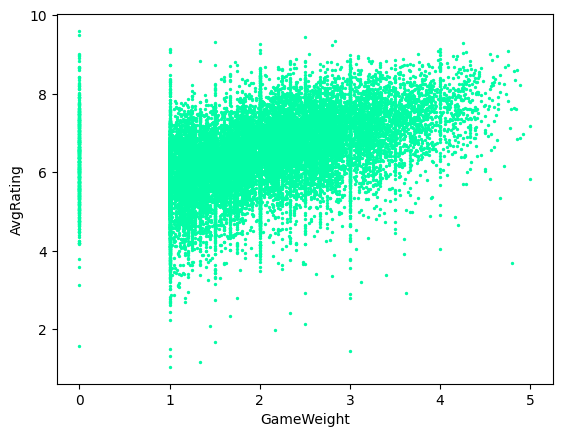

In [15]:
plt.scatter(games['GameWeight'], games['AvgRating'], color="#03fca5", s=2)
plt.xlabel('GameWeight')
plt.ylabel('AvgRating')
plt.show()

Visually, it seems as though there is some positive relationship between the two, however is not completely clear. To be more sure, we can measure the correlation between the two, and perform a statistical test to determine whether the relationship is significant. 

While the average ratings are clearly normally distributed, it is not clear whether game difficulty is. Since Pearson correlation test requires that both variables be normally distributed, we use the Spearman correlation test instead. An added benefit is that Spearman correlation is also more resistant to outliers.  

$H_0$ - There is no relationship between game difficulty and average rating. \
$H_A$ - There is a relationship between game difficulty and average rating.

In [17]:
result = sp.spearmanr(games['GameWeight'], games['AvgRating'])
print(f'Statistic: {result.statistic}, p-value: {result.pvalue}')

Statistic: 0.5040721761092029, p-value: 0.0


The p-value may have been a small enough number that scipy decided to round it down to 0. Regardless, at 0.05 significance level, there is strong evidence that a board games's difficulty is related to its average rating. 